# 6.5: Unsupervised Machine Learning: Clustering

## Importing libraries and data

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [64]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [65]:
# Importing path
path = r'C:\Users\Aricia\11-2025 Chocolate Bar Ratings'

In [66]:
# Importing previously cleaned data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_choc_clean.csv'), index_col = False)

## Checking and cleaning data

In [67]:
df.columns

Index(['Unnamed: 0', 'company_manufacturer', 'bar_origin', 'review_ID',
       'review_date', 'cocoa_percentage', 'company_location', 'rating',
       'bean_region'],
      dtype='object')

In [68]:
# Dropping the Unnamed column 
df = df.drop('Unnamed: 0', axis=1)
df.head (5)

,company_manufacturer,bar_origin,review_ID,review_date,cocoa_percentage,company_location,rating,bean_region
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [69]:
df.shape

(1795, 8)

In [70]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

company_manufacturer    0
bar_origin              0
review_ID               0
review_date             0
cocoa_percentage        0
company_location        0
rating                  0
bean_region             0
dtype: int64

In [71]:
# Check for duplicates
dups = df.duplicated()
dups.shape # No dups

(1795,)

In [72]:
# Create a subset excluding the qualitative data , as the goal is toshow statistical relationship between variables

sub = df[['review_date', 'cocoa_percentage', 'rating']]

In [73]:
sub

,review_date,cocoa_percentage,rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50
...,...,...,...
1790,2011,0.70,3.75
1791,2011,0.65,3.00
1792,2011,0.65,3.50
1793,2011,0.62,3.25


## The elbow technique

In [74]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [75]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15789.17670885794,
 -4782.438896488196,
 -2851.0157470761415,
 -1646.457795325763,
 -1134.453497944953,
 -816.0056109053166,
 -734.7035518175501,
 -649.1845053009727,
 -554.4756823929356]

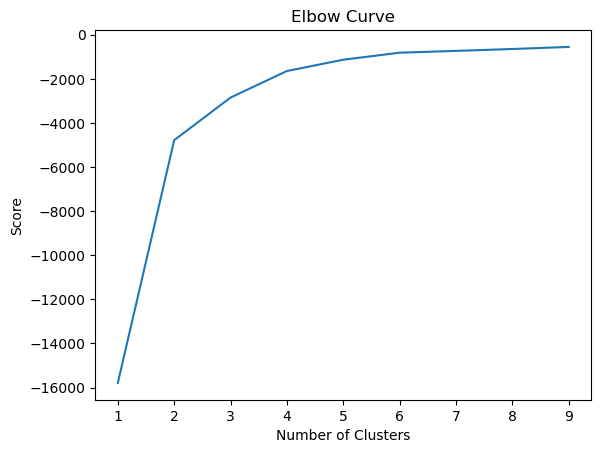

In [76]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

On the elbow curve, the largest jump occurs from 2 to 3, and the curve starts to flatten out after. This means that the optimal count for my cluster is 3.

### k-means clustering

In [77]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [78]:
# Fit the k-means object to the data.

kmeans.fit(sub)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [81]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Aricia\AppData\Local\Temp\ipykernel_49620\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [83]:
sub.head ()

,review_date,cocoa_percentage,rating,clusters
0,2016,0.63,3.75,0
1,2015,0.70,2.75,0
2,2015,0.70,3.00,0
3,2015,0.70,3.50,0
4,2015,0.70,3.50,0


In [85]:
sub['clusters'].value_counts()

clusters
0    775
2    655
1    365
Name: count, dtype: int64

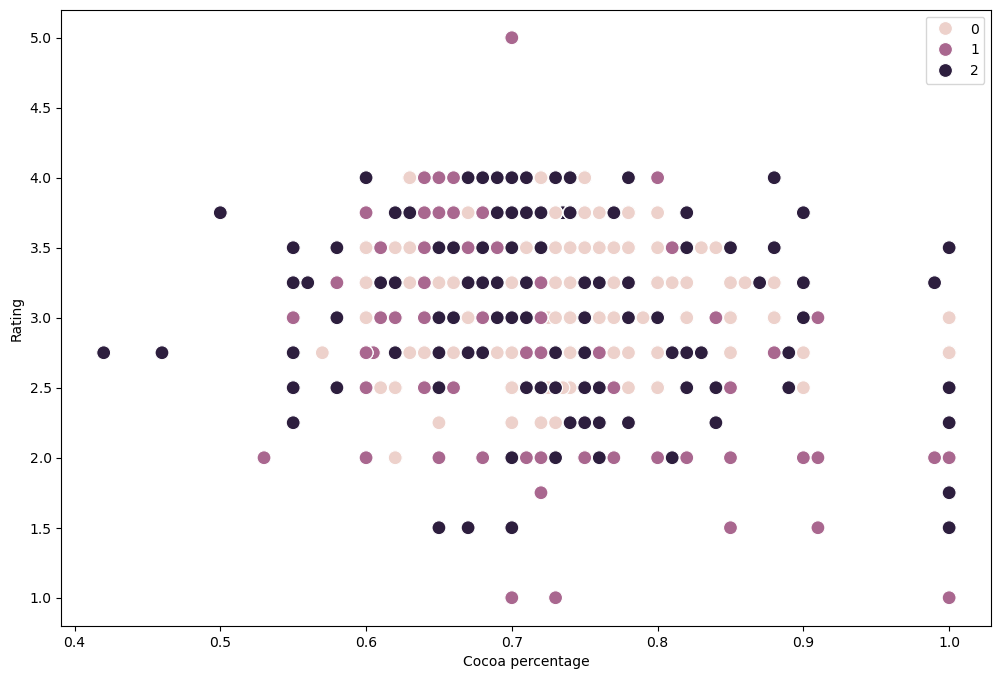

In [87]:
# Plot the clusters for the "Cocoa_percentage" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cocoa_percentage'], y=df['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa percentage') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

The scatterplot above confirms the initial thought that there is not a meaningful relation between cocoa percentage and ratings. There is not a clear separation between the colors, which means that the cluster is not differentiating the data based on the two key factos, confirming a clear lack of structure.

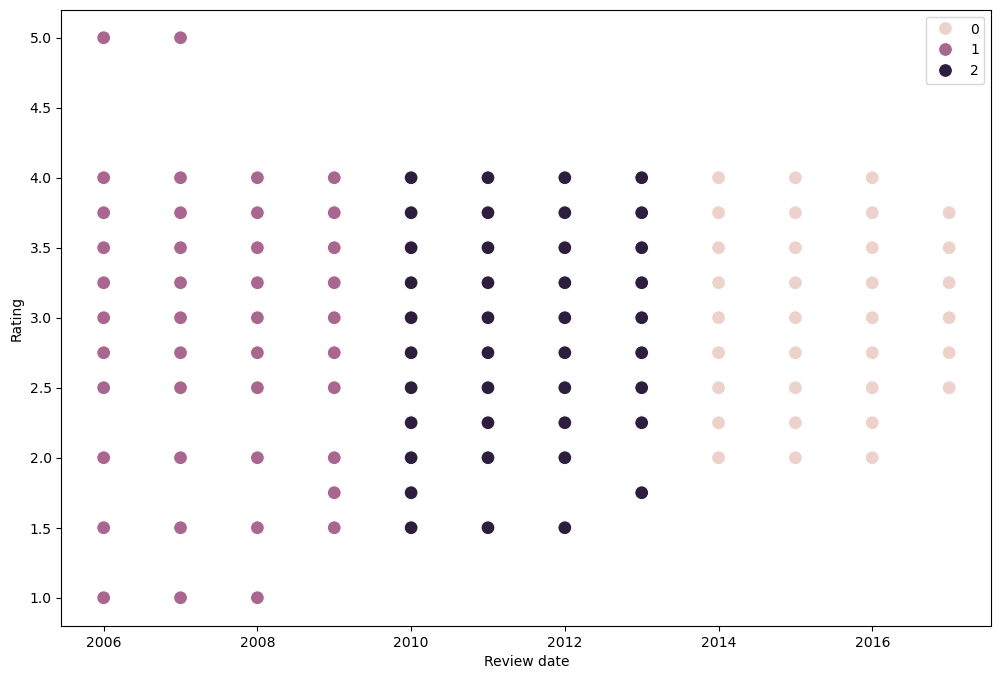

In [88]:
# Plot the clusters for the "Review_date" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_date'], y=df['rating'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Review date') 
plt.ylabel('Rating') 
plt.show()

This scatterplot is well defined into three categories, however not so insightful. The clear division is regarding review dates, which does have a clear separation between the years, meaning that time feature was the only variable that mattered on this cluster.

In [91]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Aricia\AppData\Local\Temp\ipykernel_49620\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [93]:
sub.groupby('cluster').agg({'review_date':['mean', 'median'], 
                         'cocoa_percentage':['mean', 'median'], 
                         'rating':['mean', 'median']})

review_date         cocoa_percentage           rating       
                    mean  median             mean median      mean median
cluster                                                                  
dark purple  2011.690076  2012.0         0.714679    0.7  3.198092   3.25
pink         2015.025806  2015.0         0.720032    0.7  3.224516   3.25
purple       2007.731507  2008.0         0.714644    0.7  3.082192   3.00

This analysis just reiterates what was already shown on scatterplots, which means that KMeans algorithm was primarily separated based on time. The cocoa percentage  information shows they are basically the same throughout the three clusters - i.e there's no significant difference on percentage accross different time periods. Regarding ratings, earlier years (purple) has lower mean and medians compared to the others, suggesting an increase of rating over time. 
Considering that ratings are subjective, the increase on mean and median could be a result of increased quality, changes in review standards, different chocolate types, but also could be related to bias or subjective analysis.
Overall, the date of review shows a higher connection with ratings than the cocoa porcentage.